<a href="https://colab.research.google.com/github/egouello/1NSI/blob/main/Tableaux_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tableaux avec Pandas

## 1. La bibliothèque Pandas

### 1.1 Principes de base

La bibliothèque csv nous permet de manipuler des tables mais seulement d’aspect simple car l’enchainement des étapes de traitement vont vite conduire à des constructions fastidieuses et peu lisibles d’instructions.

Pour remédier à ce problème, nous allons utiliser la bibliothèque pandas qui permet d’exprimer de façon simple, lisible et concise le genre de transformations de données. On dit que c'est une bibliothèque de haut niveau car elle permet de manipuler de façon plus simple les données en cachant les techniques utilisées. Pandas est une bibliothèque très connue des scientifiques des données (data scientists) qui manipulent des grandes quantités de données structurées sous forme de tableaux. Cette bibliothèque est tellement grande et puissante que des ouvrages entiers lui sont consacrés !

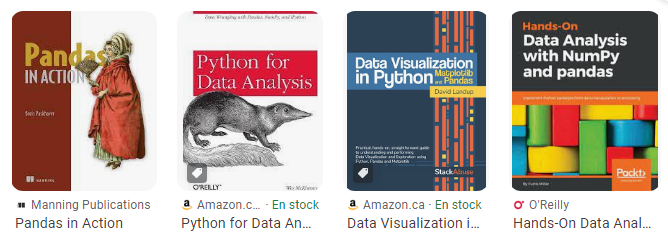

Regardons ci-dessous comment on lit un fichier csv et comment on peut afficher certaines infos :

In [3]:
import pandas
base = pandas.read_csv("fakename3.csv", delimiter=",", keep_default_na=False)

print(base.head())  #on affiche les premières ligne de la table

       Nom   Prenom   Genre Etat  Age  Poids  Taille
0  Mcclean     John    male   AZ   84   93.4     181
1    Reyes  Estelle  female   FL   70   57.6     155
2     Bell    James    male   FL   71   93.0     183
3   Miller   Evelyn  female   TX   28   87.4     157
4     Nunn     Lisa  female   KY   22   83.5     170


On voit déjà que les données sont affichées de façon plus lisible !

In [18]:
base.sample(3) #on affiche 3 enregistrement pris au hasard

,Nom,Prenom,Genre,Etat,Age,Poids,Taille
124,Simmons,Catherine,female,CA,51,96.7,166
54,Legros,Lori,female,MI,56,77.2,168
197,Towne,Karrie,female,CA,29,98.0,159


In [17]:
base.columns #on affiche les colonnes, c'est à dire les champs

Index(['Nom', 'Prenom', 'Genre', 'Etat', 'Age', 'Poids', 'Taille'], dtype='object')

In [16]:
base.dtypes #on affiche les types des différents champs

Nom        object
Prenom     object
Genre      object
Etat       object
Age         int64
Poids     float64
Taille      int64
dtype: object

On remarque que pandas a reconnu le type de données propre à chaque champ.

On peut aussi avoir des données statistiques sur les données numériques grace à l’instruction ```.describe()```  

In [15]:
base.describe()

,Age,Poids,Taille
count,212.00000,212.000000,212.000000
mean,52.95283,80.839151,167.863208
std,18.70468,17.231409,8.826670
min,19.00000,48.300000,150.000000
25%,37.00000,65.875000,161.000000
50%,51.00000,81.150000,168.000000
75%,69.00000,94.125000,173.250000
max,85.00000,116.900000,190.000000


Enfin, on peut facilement ne conserver que les champs qui nous intéressent. Par exemple si l’on veut garder le poids et la taille, il suffit de taper l’instruction : ```base[["Poids","Taille"]]```

In [13]:
print(base.head(3)[["Poids","Taille"]]) #les poids et tailles des 3 premiers enregistrements
print("---------------------")
print(base[10:15][["Poids","Taille"]]) #les poids et tailles des enregistrements 10 à 14

   Poids  Taille
0   93.4     181
1   57.6     155
2   93.0     183
---------------------
    Poids  Taille
10   81.4     160
11   78.2     150
12   94.2     163
13   64.9     181
14   63.1     151


### 1.2- Dataframes et séries

Les tables lues dans les fichiers csv sont stockés par pandas sous forme de dataframes. On peut les voir comme un tableau de p-uplets nommés. Par exemple, l’enregistrement numéro 8 (obtenu grâce à la méthode ```loc```) s’obtient en exécutant.

In [14]:
base.loc[8]

Nom       Ouellette
Prenom      Willian
Genre          male
Etat             CO
Age              47
Poids          81.3
Taille          174
Name: 8, dtype: object

In [22]:
base.loc[8][["Nom"]]

Nom    Ouellette
Name: 8, dtype: object

Une série est ce que l'on obtient quand on ne sélectionne qu'un seul champ.

In [23]:
base["Etat"]

0      AZ
1      FL
2      FL
3      TX
4      KY
       ..
207    MS
208    NY
209    MN
210    MA
211    MT
Name: Etat, Length: 212, dtype: object

### 1.3 - Interrogations simples

On va reprendre les mêmes interrogations qu'on avait faites avec la bibliothèque csv.

**quels sont les noms des personnes vivant au Texas (TX)?**

In [29]:
base[base.Etat=="TX"][["Nom"]]

,Nom
3,Miller
10,Norris
21,Judkins
27,Holt
39,Kent
49,Roberts
59,Cooper
60,Bush
61,Clinton
62,Cameron


**Quels sont les prénoms des personnes qui vivent au Texas?**

In [30]:
base[base.Etat=="TX"][["Prenom"]]

,Prenom
3,Evelyn
10,Regina
21,Eleanora
27,Ruby
39,Stacy
49,Deborah
59,John
60,Steve
61,John
62,John


**Quels sont les noms des personnes de plus de cinquante ans?**

In [31]:
base[base.Age>=50] [["Nom"]]

,Nom
0,Mcclean
1,Reyes
2,Bell
11,Ross
12,Puryear
...,...
201,Shealy
202,Keith
204,Still
206,Sandoval


### 1.4 - Tris

Les méthodes ```nlargest``` et ```nsmallest``` permettent de déterminer les plus grands et plus petits éléments selon un critère donné. Ainsi si l’on veut obtenir les 10 personnes les plus âgées et les 10 personnes les plus petites

In [32]:
base.nlargest(10, "Age")

,Nom,Prenom,Genre,Etat,Age,Poids,Taille
24,Cole,Latoya,female,NJ,85,94.0,162
0,Mcclean,John,male,AZ,84,93.4,181
75,Vadnais,Tammy,female,OR,84,77.7,161
138,Arroyo,Leah,female,MD,84,61.4,155
145,Elliot,Stephen,male,WA,84,96.5,165
187,Robinson,Annette,female,NY,84,88.2,154
17,Smith,James,male,FL,83,81.0,176
74,Hulse,Thomas,male,CA,83,60.9,172
82,Morgan,Elva,female,CO,83,88.7,162
182,Russell,Robert,male,VA,83,64.8,170


In [33]:
base.nsmallest(10,"Taille")

,Nom,Prenom,Genre,Etat,Age,Poids,Taille
11,Ross,Sandra,female,MS,79,78.2,150
128,Barron,Rosa,female,ID,82,79.3,150
14,Rencher,Theresa,female,OH,73,63.1,151
30,Grubb,Jill,female,VA,76,79.9,151
29,Johnson,Michelle,female,AZ,49,96.8,153
65,Felton,Ruby,female,NC,64,102.4,153
102,Robinson,Mary,female,TX,73,78.5,153
155,Herrera,Kristen,female,TX,77,64.4,153
158,Wilson,Ruth,female,WV,60,63.0,153
194,Shelton,Rachel,female,NY,62,58.8,153


Le tri d’un dataframe s’effectue à l’aide de la méthode sort_values, comme par exemple :

In [34]:
base.sort_values(by="Taille")

,Nom,Prenom,Genre,Etat,Age,Poids,Taille
128,Barron,Rosa,female,ID,82,79.3,150
11,Ross,Sandra,female,MS,79,78.2,150
30,Grubb,Jill,female,VA,76,79.9,151
14,Rencher,Theresa,female,OH,73,63.1,151
194,Shelton,Rachel,female,NY,62,58.8,153
...,...,...,...,...,...,...,...
174,Catanzaro,Douglas,male,KY,33,103.2,185
210,Reid,Shawn,male,MA,56,67.9,185
122,Bonar,Stacy,male,MN,47,75.2,186
77,Newell,James,male,CA,32,110.8,186


On peut trier selon plusieurs critères, en spécifiant éventuellement les monotonies :

In [36]:
base.sort_values(by=["Etat","Poids"],ascending=[True, False])[["Etat","Nom","Poids"]] #on trie d'abord par État (croissant) puis par Poids (décroissant). On affiche seulement Etat, Nom et Poids

,Etat,Nom,Poids
55,AK,Craft,78.2
81,AL,Hickman,114.2
34,AL,Mack,65.3
25,AL,Lopez,51.6
136,AR,Gonzales,84.3
...,...,...,...
113,WA,Crawford,88.0
6,WI,Wynne,99.1
196,WI,Peters,93.4
148,WI,Campbell,78.7


### 1.5 - Manipulation de données

Il est très facile de créer de nouveaux champs à partir d’anciens. Par exemple, si l’on veut calculer l’écart de poids de chaque personne à la moyenne (80.839151), il suffit d’entrer les instructions suivantes  

In [42]:
poids_moyen=base.describe()["Poids"]["mean"]
print(poids_moyen)

80.83915094339623


In [53]:
base["Ecart"]=base.Poids-poids_moyen #on crée un nouveau champs Ecart en soustrayant le poids avec le poids moyen
print(base.head())

       Nom   Prenom   Genre Etat  Age  Poids  Taille      Ecart
0  Mcclean     John    male   AZ   84   93.4     181  12.560849
1    Reyes  Estelle  female   FL   70   57.6     155 -23.239151
2     Bell    James    male   FL   71   93.0     183  12.160849
3   Miller   Evelyn  female   TX   28   87.4     157   6.560849
4     Nunn     Lisa  female   KY   22   83.5     170   2.660849


On voit par exemple que John Mcclean pèse 12.56kg de plus que le poids moyen...

## 2. Exercices

on lit le fichier cities15000.txt qui est de type csv dont les champs sont délimités par des tabulations.
Ce fichier contient la liste des villes de plus de 15000 habitants.

On commence par ajouter les entêtes de colonnes. Ensuite, c'est à vous de jouer pour trouver les bonnes instructions.


In [44]:
ville = pandas.read_csv("cities15000.txt",delimiter="\t", keep_default_na=False) #on lit le fichier
ville.columns = ["geonameid","name","asciiname","alternatenames","latitude","longitude",
                 "feature class","feature code","country code","cc2","admin1 code",
                 "admin2 code","admin3 code","admin4 code","population","elevation","dem","timezone","modification date"] #on ajoute les entêtes de colonnes

### a. Afficher les premières lignes du dataframe ville

### b. Afficher 7 lignes au hasard



### c. Afficher les colonnes

### d. Afficher les descriptions statistiques

### e. Afficher 7 lignes au hasard avec seulement les 4 colonnes 'name', 'latitude', 'longitude','population'

### f. Afficher la ligne 10

### g. Afficher les villes avec une population supérieure à 1 000 000 d'habitants

### h. Afficher les 10 villes les plus au nord

### i. Afficher les 10 villes les plus au sud

### j. Afficher la concaténation des 10 villes les plus au nord avec les 10 villes les plus au sud
Ne cherchez pas la solution plus haut dans le cours, cherchez plutot sur internet...

### k. Afficher une requete que vous trouvez intéressante sur ce fichier
question où vous devez faire preuve d'imagination...

### l. fusion de deux dataframes

on lit le fichier country-capitals.csv dont les champs sont délimités par des , et qui contient les capitales des pays :

In [49]:
pays = pandas.read_csv("country-capitals.csv",delimiter=",", keep_default_na=False)

In [50]:
pays

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NULL,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
...,...,...,...,...,...,...
240,Northern Cyprus,North Nicosia,35.183333,33.366667,NULL,Europe
241,Hong Kong,N/A,0.000000,0.000000,HK,Asia
242,Heard Island and McDonald Islands,N/A,0.000000,0.000000,HM,Antarctica
243,British Indian Ocean Territory,Diego Garcia,-7.300000,72.400000,IO,Africa


la commande qui suit permet de fusionner les deux dataframe grâce à une colonne commune :

In [51]:
pays_capitales=pandas.merge(ville, pays, left_on="name", right_on="CapitalName") #le champs "name" de ville, doit-être égal au champs "CapitalName" de pays

In [52]:
pays_capitales

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,...,elevation,dem,timezone,modification date,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,3041563,Andorra la Vella,Andorra la Vella,"ALV,Ando-la-Vyey,Andora,Andora la Vela,Andora ...",42.50779,1.52109,P,PPLC,AD,,...,,1037,Europe/Andorra,2010-05-30,Andorra,Andorra la Vella,42.500000,1.516667,AD,Europe
1,292968,Abu Dhabi,Abu Dhabi,"A-pu-that-pi,AEbu Saby,AUH,Aboe Dhabi,Abou Dab...",24.45118,54.39696,P,PPLC,AE,,...,,13,Asia/Dubai,2019-09-05,United Arab Emirates,Abu Dhabi,24.466667,54.366667,AE,Asia
2,1138958,Kabul,Kabul,"Cabool,Caboul,Cabul,Cabul - kabl,Cabul - کابل,...",34.52813,69.17233,P,PPLC,AF,,...,,1798,Asia/Kabul,2019-09-05,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
3,3573374,The Valley,The Valley,"De Balei,El Valle,La-Valo,The Valley,Vali,Vali...",18.21704,-63.05783,P,PPLC,AI,,...,7,19,America/Anguilla,2019-09-05,Anguilla,The Valley,18.216667,-63.050000,AI,North America
4,3183875,Tirana,Tirana,"TIA,Terana,Theranda,Tiorana,Tiorána,Tiran,Tira...",41.32750,19.81889,P,PPLC,AL,,...,,113,Europe/Tirane,2019-09-05,Albania,Tirana,41.316667,19.816667,AL,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,786714,Pristina,Pristina,"PRN,Prestena,Prishhina,Prishtina,Prishtinae,Pr...",42.67272,21.16688,P,PPLC,XK,,...,,597,Europe/Belgrade,2019-09-05,Kosovo,Pristina,42.666667,21.166667,KO,Europe
275,71137,Sanaa,Sanaa,"SAH,Sano,San'a,San'a',San'ah,San`a',Sana,Sana'...",15.35472,44.20667,P,PPLC,YE,,...,,2253,Asia/Aden,2015-06-04,Yemen,Sanaa,15.350000,44.200000,YE,Asia
276,964137,Pretoria,Pretoria,"E-Pitoli,IPitoli,PRY,Pitoli,Praetoria,Prehtory...",-25.74486,28.18783,P,PPLC,ZA,,...,,1332,Africa/Johannesburg,2019-09-05,South Africa,Pretoria,-25.700000,28.216667,ZA,Africa
277,909137,Lusaka,Lusaka,"LUN,Lousaka,Louzaka,Lusaca,Lusak,Lusaka,Lusako...",-15.40669,28.28713,P,PPLC,ZM,,...,,1277,Africa/Lusaka,2019-09-05,Zambia,Lusaka,-15.416667,28.283333,ZM,Africa


avec une fusion, afficher les capitales de plus de 1 000 000 d'habitants en y ajoutant cette fois le pays dans lequel elles se trouvent et le continent.

### m. avec une fusion, afficher les 10 capitales les plus au sud mais en y ajoutant cette fois le pays dans lequel elles se trouvent et le continent

### n. Avec une fusion, effectuer une requete de votre choix qui mène à une donnée interressante